In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.colors import ListedColormap
%matplotlib inline

In [8]:
def init(inputs, outputs, nn, reg=0.1, ep=0.01):
    np.random.seed(0)
    W1 = np.random.randn(inputs, nn) / np.sqrt(inputs)
    b1 = np.zeros((1, nn))
    W2 = np.random.randn(nn, outputs) / np.sqrt(nn)
    b2 = np.zeros((1, outputs))
    model = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2, 'A1':np.nan, 'A2':np.nan, 'reg':reg, 'ep':ep}
    return model

def train(model, X, y, cir):
    for i in xrange(0, cir):
        fc(model, X)
        bp(model, X, y)
        #if i % 1000 == 0:
        print "Loss {}".format(costF(model, X, y))            
    return 

def predict(model):
    A2 = model['A2']
    y_bar = np.argmax(A2, axis=1)
    return y_bar    

def sigmoid(Z):
    h = 1.0 / ( 1.0 + np.exp(-Z))
    return h

def softmax(Z):
    h = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
    return h

def af(Z):
    h = np.tanh(Z)
    return h
    
def costF(model, X, y):
    W1, A1, W2, A2 = model['W1'], model['A1'], model['W2'], model['A2']
    #计算损失    
    y_loss = (1.0 / X.shape[0]) * (np.sum(-np.log(A2[range(X.shape[0]), y])))
    r_loss = ( model['reg'] / 2.0 ) * ( np.sum(np.square(W1)) + np.sum(np.square(W2)) )
    loss = y_loss + r_loss
    if np.isnan(loss):
        return np.inf
    else:
        return loss

def fc(model, X):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    Z1 = X.dot(W1) + b1
    A1 = af(Z1)
    Z2 = A1.dot(W2) + b2
    A2 = softmax(Z2)
    model['A1'] = A1
    model['A2'] = A2
    return 

def bp(model, X, y):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2'] 
    A1, A2 = model['A1'], model['A2']
    reg = model['reg']
    ep = model['ep']
    A2[range(X.shape[0]), y] -= 1

    delta3 = A2
    delta2 = delta3.dot(W2.T) * (1 - np.power(A1, 2))
    dW2 = (A1.T).dot(delta3) + (reg * W2)
    db2 = np.sum(delta3, axis=0, keepdims=True)
    dW1 = (X.T).dot(delta2) + (reg * W1)
    db1 = np.sum(delta2, axis=0, keepdims=True)
    
    W1 += -ep * dW1
    b1 += -ep * db1
    W2 += -ep * dW2
    b2 += -ep * db2
    
    A2[range(X.shape[0]), y] += 1
    return

def plotdb(model, X, y):
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    X_G = np.c_[xx.ravel(), yy.ravel()]
    fc(model, X_G)
    zz = predict(model)
    zz = zz.reshape(xx.shape)
    plt.contour(xx, yy, zz, linwidth=2, color='g')
    color = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.pcolormesh(xx, yy, zz, cmap=color)
    plt.scatter(X[:,0], X[:,1], c=y, s=60, cmap=plt.cm.Spectral)


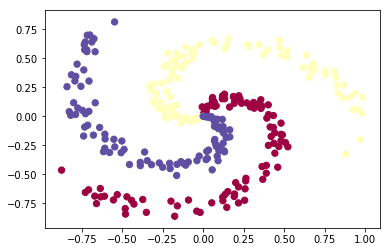

In [9]:
N = 100 # 每类样本个数
D = 2 # 维度
K = 3 # 类别数
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # 半径
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # 角度，加上是一个随机噪声
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

In [10]:
model = init(2, 3, 5, 0.1, 0.01)
train(model, X, y, 200)
acc = 100.0 * sum(predict(model) == y) / y.size
print acc

Loss 1.90417517155
Loss 1.5159380805
Loss 1.48864347018
Loss 1.49980669698
Loss 1.52394021182
Loss 1.5526203763
Loss 1.58818281643
Loss 1.63561627461
Loss 1.71987886398
Loss 1.89840582516
Loss 1.87930996958
Loss 1.86054918468
Loss 1.76373912906
Loss 1.7771541306
Loss 1.79419306441
Loss 1.81528820337
Loss 1.83407435895
Loss 1.85545143486
Loss 1.87569035577
Loss 1.90443003989
Loss 1.94242601259
Loss 1.98541261402
Loss 2.05986879941
Loss 2.01144518995
Loss 2.03545763811
Loss 1.99506256783
Loss 1.99772941084
Loss 2.00021137083
Loss 2.0044359197
Loss 2.01766584001
Loss 2.02473375427
Loss 2.04253718976
Loss 2.05241706323
Loss 2.07366081508
Loss 2.08635650377
Loss 2.11075505201
Loss 2.12623117048
Loss 2.15330776178
Loss 2.17188332828
Loss 2.20118536948
Loss 2.22605586411
Loss 2.26099979418
Loss 2.31013337063
Loss 2.38208046673
Loss 2.49186277295
Loss 2.63764349223
Loss 2.50780489851
Loss 2.58357316029
Loss 2.48441330196
Loss 2.52271358882
Loss 2.51492372371
Loss 2.54689663025
Loss 2.561437167

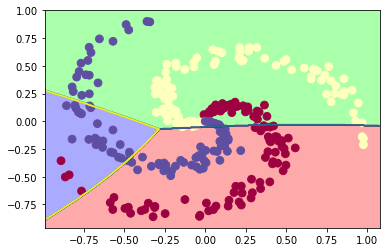

In [7]:
plotdb(model, X, y)